In [1]:
from datasets import load_dataset
import numpy as np

import matplotlib.pyplot as plt
import main as mc

# Dataset
dataset = load_dataset('inria-soda/tabular-benchmark', 'reg_num_elevators')
df = dataset['train'].to_pandas()

X = df.drop("Goal", axis=1)
Y = df["Goal"]

X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
# StupidSimple Scaling
for xc in range(np.size(X, axis=1)):
    val = np.max(np.abs(X[:, xc]))
    if val != 0:
        X[:, xc] /= val

Y /= np.max(Y)

In [38]:
# Data Split
xsample, _, ysample, _ = mc.TTSplit(X, Y, 1)

Top 3 Combinations:
SSE Score: 0.1351854960885507 | Set: ['dsilu', 'tanh', 'silu', 'tanh', 'dsilu']
SSE Score: 0.14675145418356897 | Set: ['dsilu', 'tanh', 'silu', 'silu', 'dsilu']
SSE Score: 0.20575970979455058 | Set: ['dsilu', 'silu', 'tanh', 'silu', 'dsilu']
R2 Score: 0.600524 | Training: ========================================                   


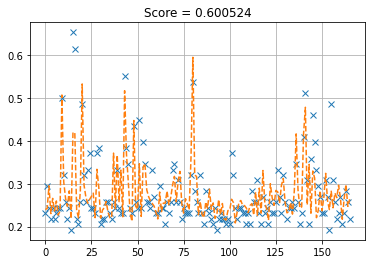

In [45]:
# Get initial model fit, optimization, and final fit
model = mc.MCRegressor(hiddenCounts=[10, 20, 10])

model.optimize_fit(xsample, ysample, trainDepthFactor=1, 
                   activationTests=['tanh', 'silu'], 
                   inputActivation='dsilu', outputActivation='dsilu')

model.fit(xsample, ysample, Ieta=30, Beta=150, Gamma=3, scoreType='r2')

# Show results
plt.plot(ysample, 'x')
plt.plot(model.predict(xsample), '--')
plt.title(f"Score = {round(model.score(xsample, ysample), 6)}")
plt.grid(True)
plt.show()

SSE Score: 1.864001 | Training: ========================================                   
R2 Score: 0.474327 | Training: ========================================                   


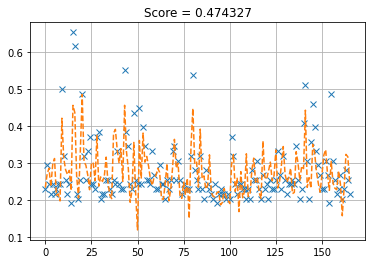

In [40]:
# Get initial model fit, optimization, and final fit
model = mc.MCRegressor(hiddenCounts=[10, 20, 10])

model.fit(xsample, ysample)

model.fit(xsample, ysample, Ieta=30, Beta=150, Gamma=3, scoreType='r2')

# Show results
plt.plot(ysample, 'x')
plt.plot(model.predict(xsample), '--')
plt.title(f"Score = {round(model.score(xsample, ysample), 6)}")
plt.grid(True)
plt.show()

SSE Score: 2.079530 | Training: ========================================                   
R2 Score: 0.543449 | Training: ========================================                   


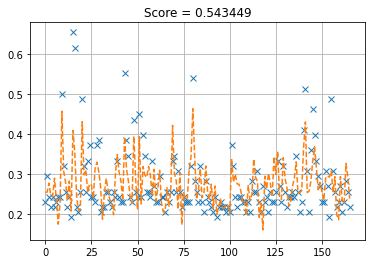

In [41]:
# Get initial model fit, optimization, and final fit
model = mc.SUNN(hiddenCounts=[10, 20, 10], activations=['silu', 'dsilu'],
                inputActivation='dsilu', outputActivation='dsilu')

model.fit(xsample, ysample)

model.fit(xsample, ysample, Ieta=30, Beta=150, Gamma=3, scoreType='r2')

# Show results
plt.plot(ysample, 'x')
plt.plot(model.predict(xsample), '--')
plt.title(f"Score = {round(model.score(xsample, ysample), 6)}")
plt.grid(True)
plt.show()

SSE Score: 1.775257 | Training: ========================================                   
R2 Score: -0.021499 | Training: ========================================                   


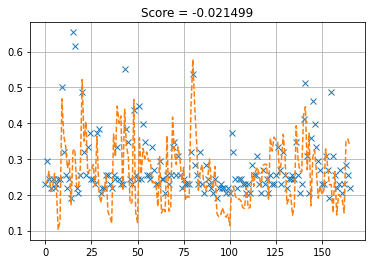

In [44]:
# Get initial model fit, optimization, and final fit
model = mc.SUNN(hiddenCounts=[10, 20, 10], activations=['silu', 'dsilu'])

model.fit(xsample, ysample)

model.fit(xsample, ysample, Ieta=30, Beta=150, Gamma=3, scoreType='r2')

# Show results
plt.plot(ysample, 'x')
plt.plot(model.predict(xsample), '--')
plt.title(f"Score = {round(model.score(xsample, ysample), 6)}")
plt.grid(True)
plt.show()

# This

In [13]:
from datasets import load_dataset

ds = load_dataset('v-card/lol')
df = ds['train'].to_pandas()

df.head()

,Text,Rating,Title
0,Absolutely wonderful - silky and sexy and comf...,4,
1,Love this dress! it's sooo pretty. i happene...,5,
2,I had such high hopes for this dress and reall...,3,Some major design flaws
3,"I love, love, love this jumpsuit. it's fun, fl...",5,My favorite buy!
4,This shirt is very flattering to all due to th...,5,Flattering shirt


In [5]:
from huggingface_hub import list_datasets
print([dataset.id for dataset in list_datasets(limit=200, search='car')])

['albertvillanova/carbon_24', 'huggingartists/cardi-b', 'v-card/lol', 'Carlisle/msmarco-passage-non-abs', 'Carlisle/msmarco-passage-abs', 'Carlisle/msmacro-test', 'Carlisle/msmacro-passage-non-abs-small', 'Carlisle/msmacro-test-corpus', 'Carlosholivan/base', 'carbon12/evaluating_student_writing', 'cgarciae/cartoonset', 'josearangos/spanish-calls-corpus-Caribbean', 'Carlos89apc/TraductorES_Kichwa', 'huggan/cartoon-faces', 'carolina-c4ai/corpus-carolina', 'aspis/car_background_removal', 'Carol99/multimodal_sarcasm_detection', 'carlosejimenez/snli_aug', 'carlosejimenez/qqp_aug', 'carblacac/twitter-sentiment-analysis', 'Carloa/Notes', 'florentgbelidji/edmunds-car-ratings', 'florentgbelidji/car-reviews', 'florentgbelidji/autotrain-data-qa-team-car-review-project', 'qualitydatalab/autotrain-data-car-review-project', 'madatnlp/partial_car_kr', 'scikit-learn/credit-card-clients', 'Nexdata/Mandarin_Speech_Data_in_Cars_by_Mobile_Phone', 'Nexdata/In-Car_Noise_Data_by_Microphone_and_Mobile_Phone',